The project assigned uses the Titanic dataset to build a machine learning model that predicts whether a passenger survived the disaster based on features like age, gender, ticket class, and fare.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Titanic-Dataset.csv")
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # S=2, C=0, Q=1

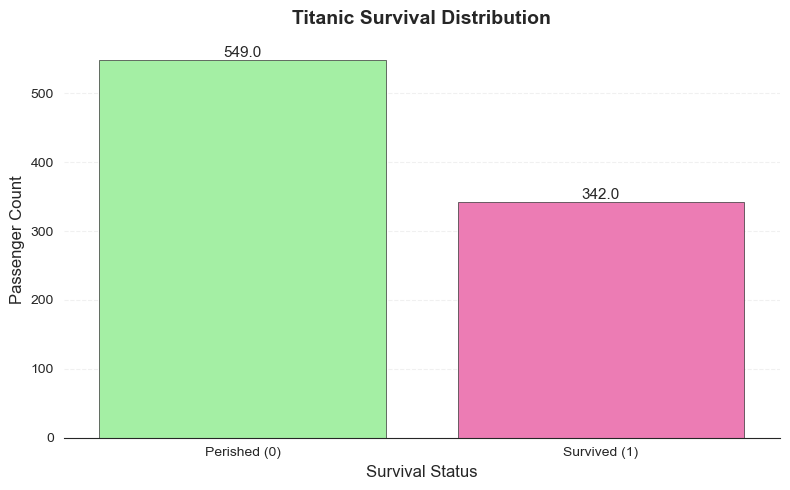

In [6]:
plt.figure(figsize=(8, 5))
sns.set_style("white")
palette = ["palegreen", "hotpink"]  
ax = sns.countplot(x='Survived', data=df, 
                  palette=palette,
                  linewidth=0.5,
                  edgecolor="#333333")

plt.title("Titanic Survival Distribution", 
          fontsize=14, 
          pad=12,
          fontweight='semibold')
plt.xlabel("Survival Status", fontsize=12)
plt.ylabel("Passenger Count", fontsize=12)
ax.set_xticklabels(["Perished (0)", "Survived (1)"])

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 5), 
               textcoords='offset points',
               fontsize=11)

sns.despine(left=True)

ax.yaxis.grid(True, color='#f0f0f0', linestyle='--')

plt.tight_layout()
plt.show()

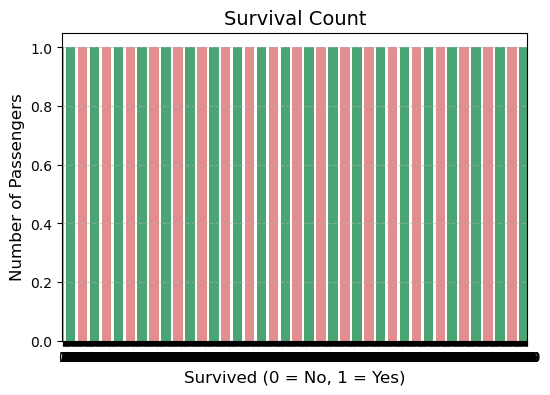

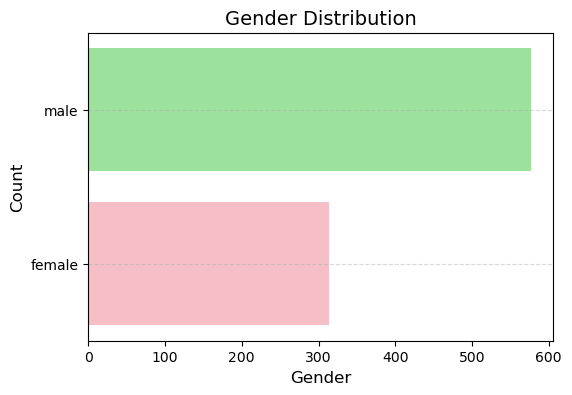

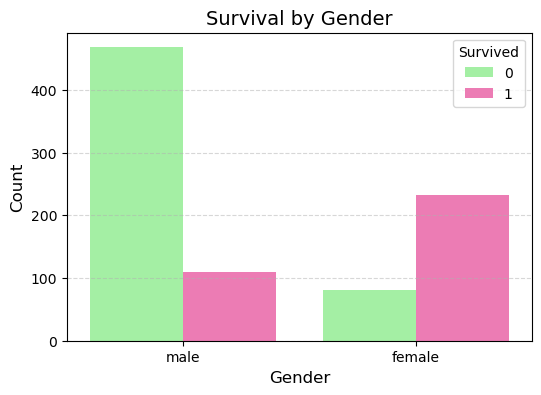

In [6]:
#Count of survivors vs non-survivors
plt.figure(figsize=(6, 4))
sns.countplot(data['Survived'], palette=['lightcoral', 'mediumseagreen'])
plt.title('Survival Count', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Gender distribution 
plt.figure(figsize=(6, 4))
sns.countplot(data['Sex'], palette=['lightgreen', 'lightpink'])
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Survival rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=data, palette={0: 'palegreen', 1: 'hotpink'})
plt.title('Survival by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
sns.set_style("whitegrid")

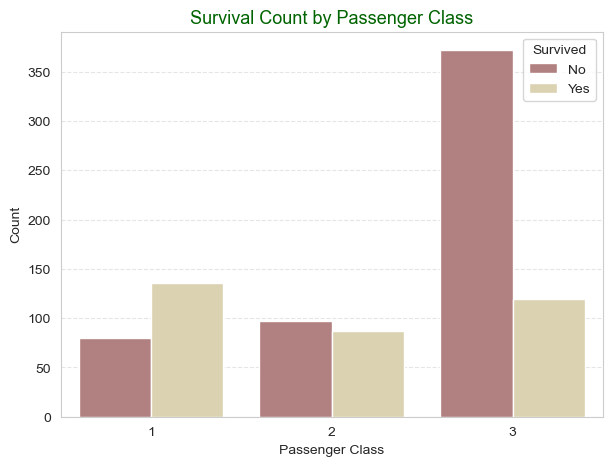

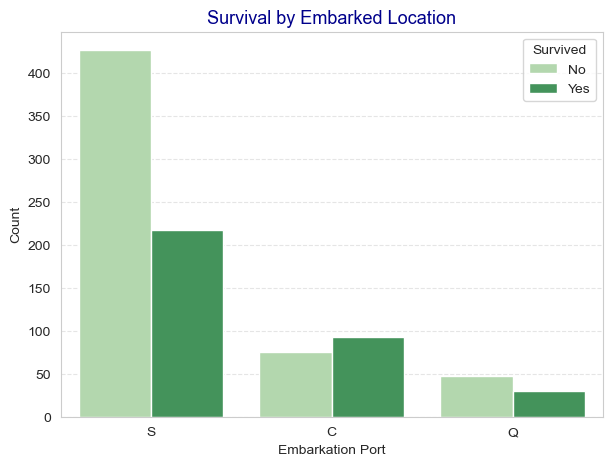

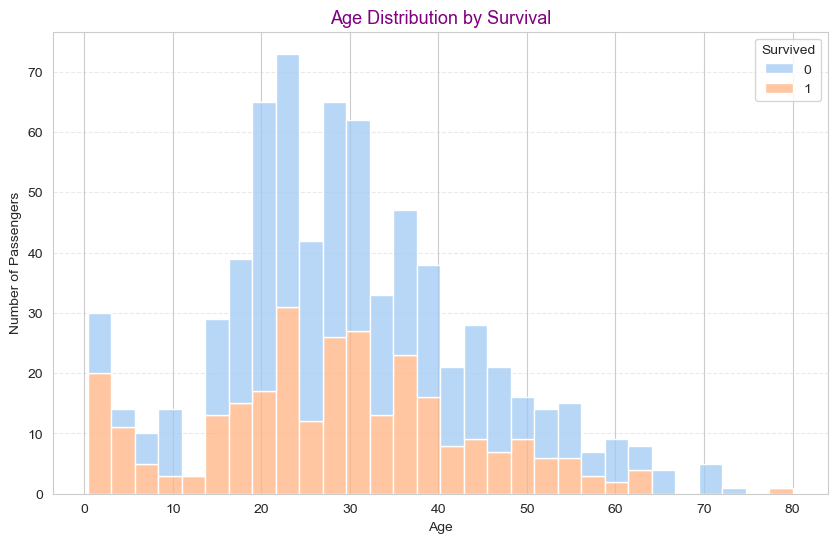

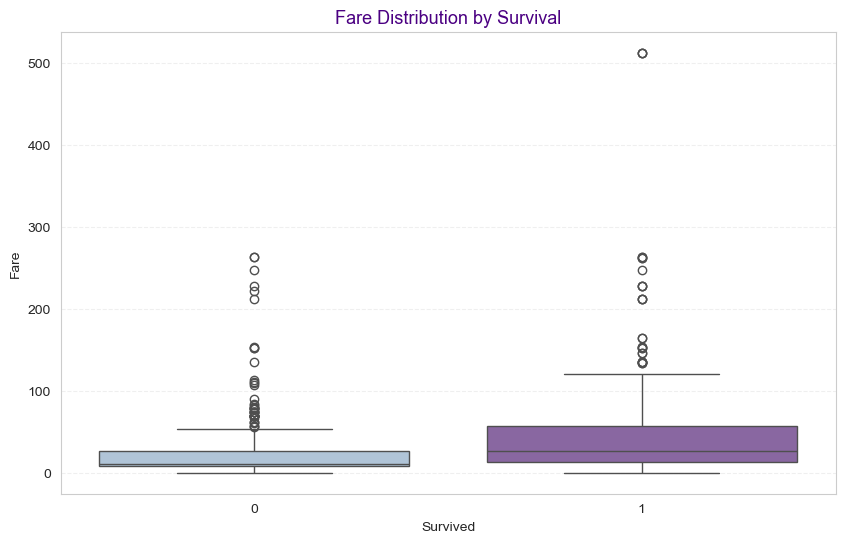

In [8]:
#Survival count by Passenger Class
plt.figure(figsize=(7,5))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='pink')
plt.title('Survival Count by Passenger Class', fontsize=13, color='darkgreen')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Survival based on Embarked location
plt.figure(figsize=(7,5))
sns.countplot(x='Embarked', hue='Survived', data=data, palette='Greens')
plt.title('Survival by Embarked Location', fontsize=13, color='darkblue')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Age distribution with survival overlay
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', palette='pastel', bins=30)
plt.title('Age Distribution by Survival', fontsize=13, color='purple')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Fare vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=data, palette='BuPu')
plt.title('Fare Distribution by Survival', fontsize=13, color='indigo')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

The data visualizations reveal key survival patterns on the Titanic. Passengers in 1st class had significantly higher survival rates, while those in 3rd class faced the lowest chances. Similarly, individuals who embarked from Cherbourg (C) appeared to have better survival outcomes compared to other ports. Age also played a role—young children were more likely to survive, whereas most deaths occurred among those aged 20 to 40. Lastly, passengers who paid higher fares had a greater chance of surviving, indicating a possible link between wealth and survival priority.l.
